## Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

In [8]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Train a decision tree with max_depth=2
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X,y)


DecisionTreeClassifier(max_depth=2)

### Visualization: export_graphviz

In [11]:
# Visualize decision tree using graphviz 
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtc, 
                  feature_names=['petal length','petal width'],  
                #   class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph.render("iris_tree",format='png', view=False)

'iris_tree.png'

In [12]:
# open image with PIL
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

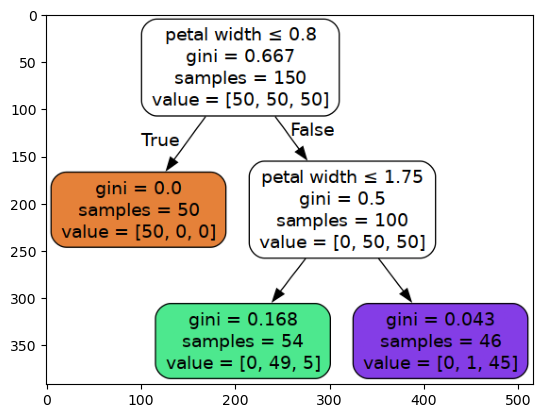

In [13]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

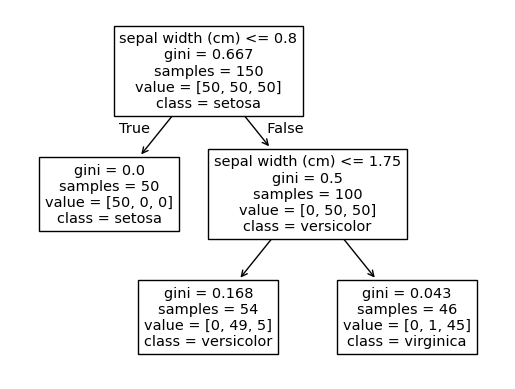

In [14]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
plot = tree.plot_tree(dtc, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [15]:
# split in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.20, random_state=42)

In [16]:
# fit classifier with max_depth=2
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
# make predictions on the test set
y_pred_test = dtc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
y_t,y_p = y_test,y_pred_test
# Print Accuracy
print("Accuracy=",accuracy_score(y_t,y_p))
# Print Confusion matrix
print(confusion_matrix(y_t,y_p))
# Print Precision
print("precision=",precision_score(y_t,y_p,average='micro'))
# Print Recall
print("recall=",recall_score(y_t,y_p,average='micro'))
# Print F1-score
print("f1=",f1_score(y_t,y_p,average='micro'))


Accuracy= 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
precision= 0.9666666666666667
recall= 0.9666666666666667
f1= 0.9666666666666667


## Random forests

Explain here how they work in your own words: This is a bagging of decision tree\
1/ bootstraping : create aletnative data set by picking random element (an element can be picked up multple times)\
2/ choose a couple of features for each data set\
3/ train decision tree for each data set where split are made with the couple of features\
4/ Aggregate the results (mean for regression, most frequent for classicfication)

In [19]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [20]:
# make predictions on the test set
y_pred_test = rfc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
y_t,y_p = y_test,y_pred_test
# Print Accuracy
print("Accuracy=",accuracy_score(y_t,y_p))
# Print Confusion matrix
print(confusion_matrix(y_t,y_p))
# Print Precision
print("precision=",precision_score(y_t,y_p,average='micro'))
# Print Recall
print("recall=",recall_score(y_t,y_p,average='micro'))
# Print F1-score
print("f1=",f1_score(y_t,y_p,average='micro'))

Accuracy= 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
precision= 1.0
recall= 1.0
f1= 1.0


## SVM

Explain here how they work in your own words:

In [22]:
# Book example SVM: iris dataset


In [23]:
# fit a linear SVM classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
# make predictions on the test set
y_pred_test = svc.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
y_t,y_p = y_test,y_pred_test
# Print Accuracy
print("Accuracy=",accuracy_score(y_t,y_p))
# Print Confusion matrix
print(confusion_matrix(y_t,y_p))
# Print Precision
print("precision=",precision_score(y_t,y_p,average='micro'))
# Print Recall
print("recall=",recall_score(y_t,y_p,average='micro'))
# Print F1-score
print("f1=",f1_score(y_t,y_p,average='micro'))

Accuracy= 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
precision= 1.0
recall= 1.0
f1= 1.0


## Learning curves

### Book example

In [26]:
# Book Dataset
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [32]:
# Implement the book’s code on learning curves on the data he has used.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
# X_poly[0]

array([2.74256089])

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1370342]), array([[1.09919667, 0.47987167]]))

In [57]:
lin_reg.coef_[0][1]

np.float64(0.4798716749921075)

<Axes: title={'center': 'y vs X'}>

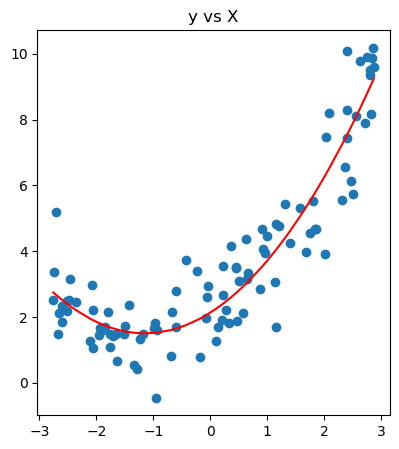

In [71]:
#data
df_pf = pd.DataFrame(X_poly,columns=["x","x**2"])
df_pf["pred"] = lin_reg.intercept_ + lin_reg.coef_[0][0]*df_pf["x"] + lin_reg.coef_[0][1]*df_pf["x**2"]
df_pf = df_pf.sort_values('x')
#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax0 = plt.subplot(1,2,1)
ax0.scatter(x=X,y=y) 
ax0.set_title("y vs X")
ax0.plot(df_pf['x'],df_pf['pred'],'r')
ax0


Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [29]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves():
   pass

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [75]:
#DATA SET
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    df_result = pd.DataFrame(columns=['mean train','mean valid','std train','std valid'])
    for ts in train_sizes:
        if ts!=1:
            X_ts, _, y_ts, _ = train_test_split(X, y, test_size=ts)
        else: 
            X_ts,y_ts = X,y
        cv_score = cross_validate(estimator,X_ts,y_ts,cv=cv,n_jobs=n_jobs,return_train_score = True)
        df_result.loc[ts,'mean train']=np.mean(cv_score['train_score'])
        df_result.loc[ts,'mean valid']=np.mean(cv_score['test_score'])
        df_result.loc[ts,'std train']=np.std(cv_score['train_score'])
        df_result.loc[ts,'std valid']=np.std(cv_score['test_score'])
    #plotting
    # return df_result
    fig = plt.figure(figsize = (10,10))
    ax = plt.subplot(1,1,1)
    df_result['mean train'].plot()
    df_result['mean valid'].plot()
    x= list(df_result.reset_index()['index'])
    y1 = list(df_result['mean train'] + df_result['std train'])
    y2 = list(df_result['mean train'] - df_result['std train'])
    y3 = list(df_result['mean valid'] + df_result['std valid'])
    y4 = list(df_result['mean valid'] - df_result['std valid'])
    ax.fill_between(x=x,y1 = y1,y2 = y2)
    ax.fill_between(x=x,y1 = y1,y2 = y2)
    return df_result

    
# create your method to plot your learning curves using the sklearn method learning_curve()
    

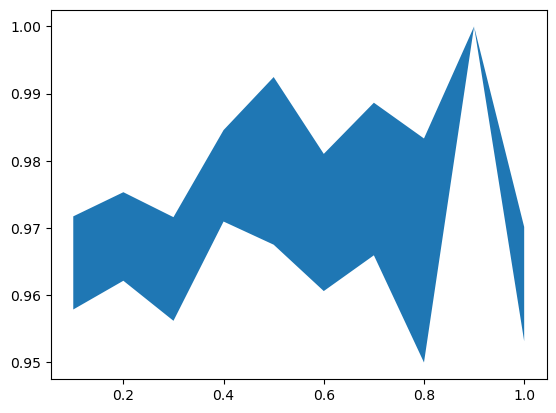

In [124]:
df_result.reset_index()
x= list(df_result.reset_index()['index'])
y1 = list(df_result['mean train'] + df_result['std train'])
y2 = list(df_result['mean train'] - df_result['std train'])
y2
plt.fill_between(x=x,y1=y1,y2=y2)


/home/thomas.mari@Digital-Grenoble.local/anaconda3/envs/ml3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


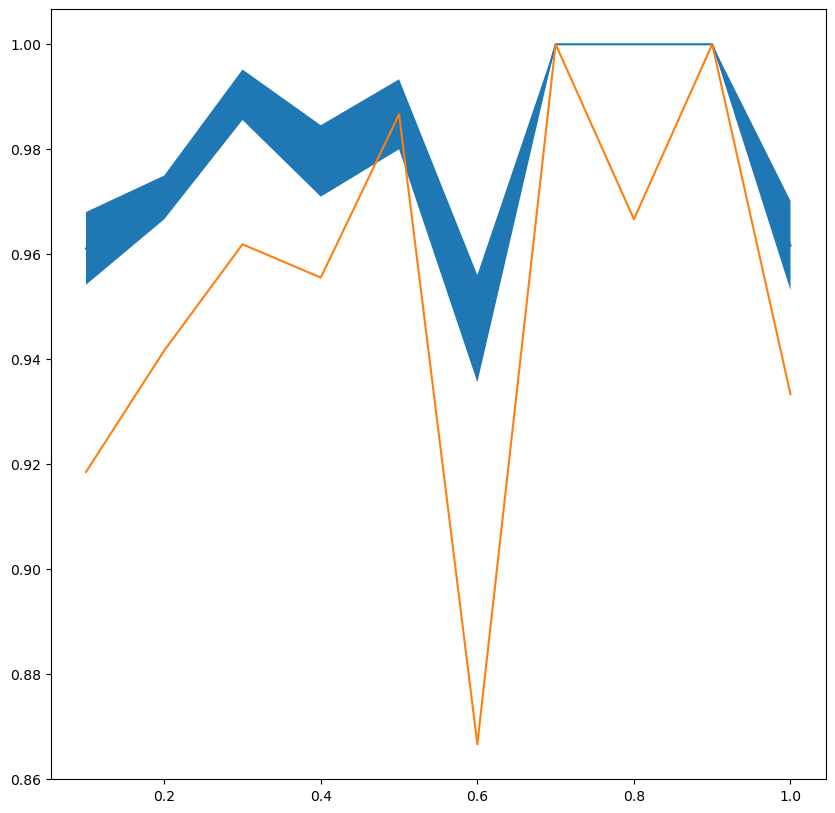

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
df_result = plot_learning_curve(dtc,"title",X,y,train_sizes=np.linspace(.1, 1.0, 10))


In [77]:
cv

NameError: name 'cv' is not defined

## Decision trees learning curves

In [ ]:
# import the dataset you want

In [ ]:
# do all the pre-rpocessing that is needed

In [ ]:
# Underfit model
# Train a decision tree with max_depth=2

In [ ]:
# Overfit model
# Train a decision tree with max_depth=10

## Random forests classifier learning curves

In [ ]:
# Underfit model

In [ ]:
# Overfit model

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

In [ ]:
# Underfit model?


In [ ]:
# Overfit model?


## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [ ]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves